<a href="https://colab.research.google.com/github/dolmani38/nash_loss/blob/master/A_Continuos_Optimization_Algorithm_based_on_Fictitious_Play_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np


# 주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
# 전체 pure strategy와 mixed strategy를 생성한다.

def make_strategy(number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
    """
    [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
    .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
    """
    def non_duplicate_randrange(l,h,r,c):
        #lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        #while (not len(lst[:,0]) == len(set(lst[:,0]))):
        #    lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        #return lst    
        t = np.ones((c,2))
        x = np.linspace(l, h, c)
        t[:,0] = x[:]
        t[:,1] = 1/c    
        return t      
    
    S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
    return np.asarray(S, dtype=np.float64)


#S에서 player들에 대한 전략을 선택 한다.
#선택은 mixed strategy의 확율에 의해..
def choice_strategies(strategy_matrix):
    return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])



In [2]:
#Step1-1
#모든 player의 pure strategy와, mixed strategy의 생성 & 확인
# S에 해당.
strategy_matrix = make_strategy(10,[-20,20],20,1)
strategy_matrix

array([[[-20.        ,   0.05      ],
        [-17.89473684,   0.05      ],
        [-15.78947368,   0.05      ],
        [-13.68421053,   0.05      ],
        [-11.57894737,   0.05      ],
        [ -9.47368421,   0.05      ],
        [ -7.36842105,   0.05      ],
        [ -5.26315789,   0.05      ],
        [ -3.15789474,   0.05      ],
        [ -1.05263158,   0.05      ],
        [  1.05263158,   0.05      ],
        [  3.15789474,   0.05      ],
        [  5.26315789,   0.05      ],
        [  7.36842105,   0.05      ],
        [  9.47368421,   0.05      ],
        [ 11.57894737,   0.05      ],
        [ 13.68421053,   0.05      ],
        [ 15.78947368,   0.05      ],
        [ 17.89473684,   0.05      ],
        [ 20.        ,   0.05      ]],

       [[-20.        ,   0.05      ],
        [-17.89473684,   0.05      ],
        [-15.78947368,   0.05      ],
        [-13.68421053,   0.05      ],
        [-11.57894737,   0.05      ],
        [ -9.47368421,   0.05      ],
        [ 

In [4]:
#Step1-2
#최초 t=1에 해당하는 player의 strategy 선택 & 확인 
t1 = choice_strategies(strategy_matrix)
t1

array([-11.57894737,   1.05263158,  -9.47368421,  11.57894737,
         7.36842105,  -9.47368421, -20.        ,  13.68421053,
       -17.89473684,   9.47368421])

In [5]:
#Step2-1
# player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
def make_Y_sample(strategy_matrix,player=0,p_strategy=0,sample_count = 10):
    Y_sample = np.asarray([choice_strategies(strategy_matrix) for i in range(sample_count)])
    Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
    return Y_sample


sample_count = 10
#(s0,Y-0(t))
Y0 = np.asarray([make_Y_sample(strategy_matrix,player=0,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])])
print("Shape of Y-0",Y0.shape)
Y0

Shape of Y-0 (20, 10, 10)


array([[[-20.        , -20.        ,  13.68421053, ...,   3.15789474,
          -7.36842105, -20.        ],
        [-20.        , -13.68421053,   9.47368421, ...,  13.68421053,
          -7.36842105,  -3.15789474],
        [-20.        ,   5.26315789,   3.15789474, ...,   9.47368421,
          11.57894737,  -5.26315789],
        ...,
        [-20.        ,  -7.36842105,  13.68421053, ...,   9.47368421,
          -3.15789474,   5.26315789],
        [-20.        , -15.78947368,   5.26315789, ...,  20.        ,
         -17.89473684,  20.        ],
        [-20.        ,  11.57894737,  20.        , ..., -13.68421053,
         -11.57894737,  15.78947368]],

       [[-17.89473684,  -1.05263158, -17.89473684, ..., -20.        ,
           7.36842105,  -5.26315789],
        [-17.89473684,  -5.26315789,   3.15789474, ...,  -9.47368421,
          11.57894737, -17.89473684],
        [-17.89473684,   1.05263158,  -3.15789474, ...,   1.05263158,
          15.78947368,  -5.26315789],
        ...,


In [6]:
#Step2-2
#모든 player에 대한 (si,Y-i(t))의 생성

si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
# player_count,pure_strategy_count,sample_count,strategy_count
print("Shape of si_Y_i",si_Y_i.shape)
si_Y_i


Shape of si_Y_i (10, 20, 10, 10)


array([[[[-20.        ,  20.        , -20.        , ...,  15.78947368,
          -20.        ,  13.68421053],
         [-20.        ,   3.15789474,  -3.15789474, ..., -13.68421053,
          -20.        ,   7.36842105],
         [-20.        ,   5.26315789, -13.68421053, ...,  -7.36842105,
           -1.05263158,  17.89473684],
         ...,
         [-20.        ,  -3.15789474, -13.68421053, ...,  17.89473684,
          -17.89473684, -17.89473684],
         [-20.        ,  17.89473684,  11.57894737, ...,  15.78947368,
           -1.05263158,   3.15789474],
         [-20.        ,  -1.05263158,  11.57894737, ...,  15.78947368,
           15.78947368, -15.78947368]],

        [[-17.89473684,  -3.15789474,  -1.05263158, ...,  17.89473684,
           -9.47368421,  -5.26315789],
         [-17.89473684,  15.78947368,   1.05263158, ..., -20.        ,
            5.26315789, -17.89473684],
         [-17.89473684, -11.57894737,  -1.05263158, ...,  17.89473684,
          -20.        ,  -1.05263

In [7]:
#Step2-3
# 목적함수(Test Function)의 정의
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

#Step2-4
# (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
def _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:]):
    y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
    return y_m

y_m = _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:])
y_m

array([-11.98795294, -25.92154011,  -8.34924753, -11.29221243,
        -9.68857936,   3.64815111,  15.3107192 ,  14.8797467 ,
         7.39416278,   3.46076305,   2.55248878,   5.18507262,
        -3.23562744, -10.03560967,  -0.60590684,  -1.50972066,
         7.09960836,  10.11418501,   9.88488729,  26.96424322])

In [8]:
# t+1에서 player 0의 best response 취득 
# 

br_0 =  strategy_matrix[0,y_m.argmin(),0]
br_0

-17.894736842105264

In [9]:
#Step2-5
# t+1에서 모든 player에 대한 best response 취득

br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
br

array([-17.89473684, -20.        , -20.        , -15.78947368,
       -20.        , -20.        , -20.        ,  -1.05263158,
       -20.        , -13.68421053])

In [10]:
#Step3-1
# player 0의 t+1에 대한 mixed strategy의 갱신
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
print(strategy_matrix[0,:,1])
t=1
strategy_matrix[0,:,1] = strategy_matrix[0,:,1]+(1/(t+1))*(((strategy_matrix[0,:,0]==br[0]) * 1) - strategy_matrix[0,:,1])
strategy_matrix[0,:,:]

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


array([[-20.        ,   0.025     ],
       [-17.89473684,   0.525     ],
       [-15.78947368,   0.025     ],
       [-13.68421053,   0.025     ],
       [-11.57894737,   0.025     ],
       [ -9.47368421,   0.025     ],
       [ -7.36842105,   0.025     ],
       [ -5.26315789,   0.025     ],
       [ -3.15789474,   0.025     ],
       [ -1.05263158,   0.025     ],
       [  1.05263158,   0.025     ],
       [  3.15789474,   0.025     ],
       [  5.26315789,   0.025     ],
       [  7.36842105,   0.025     ],
       [  9.47368421,   0.025     ],
       [ 11.57894737,   0.025     ],
       [ 13.68421053,   0.025     ],
       [ 15.78947368,   0.025     ],
       [ 17.89473684,   0.025     ],
       [ 20.        ,   0.025     ]])

In [11]:
#Step3-2
#모든 player의 t+1에 대한 mixed strategy의 갱신
t=1
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
for i in range(strategy_matrix.shape[0]):
    strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])

strategy_matrix

array([[[-20.        ,   0.025     ],
        [-17.89473684,   0.525     ],
        [-15.78947368,   0.025     ],
        [-13.68421053,   0.025     ],
        [-11.57894737,   0.025     ],
        [ -9.47368421,   0.025     ],
        [ -7.36842105,   0.025     ],
        [ -5.26315789,   0.025     ],
        [ -3.15789474,   0.025     ],
        [ -1.05263158,   0.025     ],
        [  1.05263158,   0.025     ],
        [  3.15789474,   0.025     ],
        [  5.26315789,   0.025     ],
        [  7.36842105,   0.025     ],
        [  9.47368421,   0.025     ],
        [ 11.57894737,   0.025     ],
        [ 13.68421053,   0.025     ],
        [ 15.78947368,   0.025     ],
        [ 17.89473684,   0.025     ],
        [ 20.        ,   0.025     ]],

       [[-20.        ,   0.525     ],
        [-17.89473684,   0.025     ],
        [-15.78947368,   0.025     ],
        [-13.68421053,   0.025     ],
        [-11.57894737,   0.025     ],
        [ -9.47368421,   0.025     ],
        [ 

In [12]:
#Step3-3
#mixed strategy의 갱신 후, 각 player의 strategy 취득
t2 = choice_strategies(strategy_matrix)
t2

array([-17.89473684,   1.05263158, -15.78947368, -15.78947368,
       -20.        ,   1.05263158,  -3.15789474,  -1.05263158,
       -15.78947368, -13.68421053])

In [13]:
#Step3-4
#이때의 f1의 값
f1(t2)

-75.34933701408326

In [0]:
#Step4
#t<-t+1로 두고 Step2와 Step3의 t=N회 반복  : 전체 최적화 알고리즘

def continuos_optimization_based_on_play_theory(object_function=f1,
                                                player_count=10,
                                                strategy_range=[-20,20],
                                                number_of_strategies = 20,
                                                sample_count = 10,
                                                epoch = 100,
                                                resolution=1):
    strategy_matrix = make_strategy(player_count,strategy_range,number_of_strategies,resolution)
    history = []
    for t in range(1,epoch+1):
        #Sample strategy 추출
        si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
        #시행에 대한 best response 추출
        br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
        #mixed strategy의 갱신
        for i in range(strategy_matrix.shape[0]):
            strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
        #다음 strategy 추출
        s = choice_strategies(strategy_matrix)
        # 목적함수의 값 산출
        mv = object_function(s)
        print("\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), end="", flush=True)
        history.append(mv)
    return s,history    

1/100 object_function([-17.89473684   1.05263158 -15.78947368 -20.         -15.78947368
2/100 object_function([  7.36842105 -17.89473684   7.36842105  -5.26315789  20.
3/100 object_function([-20.         -17.89473684 -15.78947368 -20.         -20.
4/100 object_function([-20.         -20.         -15.78947368 -17.89473684 -15.78947368
5/100 object_function([  7.36842105 -17.89473684 -17.89473684 -20.         -17.89473684
6/100 object_function([  7.36842105 -17.89473684 -15.78947368   1.05263158 -17.89473684
7/100 object_function([-17.89473684 -17.89473684 -17.89473684 -17.89473684 -17.89473684
8/100 object_function([-15.78947368 -17.89473684 -20.         -17.89473684 -13.68421053
9/100 object_function([-20.         -15.78947368 -20.         -20.         -20.
10/100 object_function([-20.         -17.89473684  -3.15789474 -20.         -17.89473684
11/100 object_function([-20.         -11.57894737 -20.          20.         -17.89473684
12/100 object_function([-20.         -17.89473684 -20.

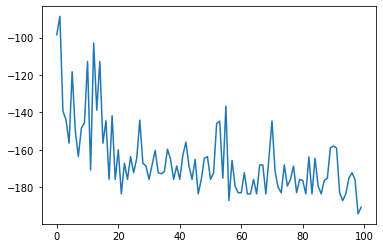

In [15]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

player_count = 10
strategy_range=[-20,20]
number_of_strategies = 20
sample_count = 10
epoch = 100
resolution = 1

s,history = continuos_optimization_based_on_play_theory(object_function=f1,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()

1/100 object_function([  3.15789474  20.          -1.05263158  -9.47368421  17.89473684
2/100 object_function([  9.47368421  11.57894737  -1.05263158  -1.05263158  -9.47368421
3/100 object_function([ 5.26315789  5.26315789 -1.05263158  1.05263158 -9.47368421  1.05263158
4/100 object_function([ 17.89473684   1.05263158  -5.26315789  -1.05263158 -17.89473684
5/100 object_function([ 9.47368421 -7.36842105 -1.05263158 -1.05263158 -9.47368421  1.05263158
6/100 object_function([ 5.26315789 -1.05263158 -1.05263158  7.36842105  3.15789474  1.05263158
7/100 object_function([ 5.26315789  5.26315789 -5.26315789 15.78947368  5.26315789  1.05263158
8/100 object_function([  3.15789474  -1.05263158  -1.05263158  -9.47368421   1.05263158
9/100 object_function([-7.36842105  3.15789474  1.05263158 -9.47368421  1.05263158 -1.05263158
10/100 object_function([ 5.26315789 11.57894737  7.36842105 -1.05263158  1.05263158 -3.15789474
11/100 object_function([ 5.26315789 -7.36842105 -1.05263158  1.05263158  3.15

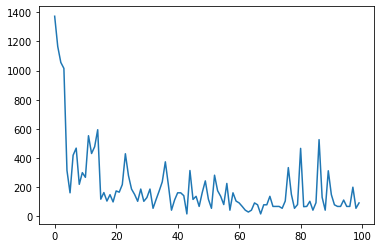

In [16]:
# 실험2
# 논문에서 f2에 해당하는 함수
def f2(player_strategies):
    y = np.sum(player_strategies*player_strategies - 10 * np.cos(2*np.pi*player_strategies)+10)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f2,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()


1/100 object_function([-13.68421053  -1.05263158  20.          11.57894737  -1.05263158
2/100 object_function([-11.57894737 -13.68421053 -13.68421053 -13.68421053   3.15789474
3/100 object_function([-11.57894737   5.26315789   7.36842105 -13.68421053  15.78947368
4/100 object_function([-11.57894737  20.          -1.05263158  13.68421053   3.15789474
5/100 object_function([ -3.15789474 -13.68421053 -20.           7.36842105   3.15789474
6/100 object_function([ -3.15789474 -13.68421053  -1.05263158 -13.68421053  13.68421053
7/100 object_function([  7.36842105  11.57894737  11.57894737 -13.68421053  -1.05263158
8/100 object_function([  3.15789474  13.68421053  -1.05263158 -11.57894737  -1.05263158
9/100 object_function([-11.57894737 -13.68421053   7.36842105 -13.68421053  13.68421053
10/100 object_function([  1.05263158 -15.78947368   7.36842105 -13.68421053  -1.05263158
11/100 object_function([ -3.15789474  -9.47368421 -20.          15.78947368  13.68421053
12/100 object_function([ -9.47

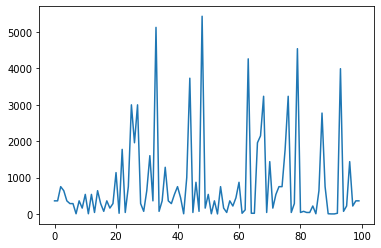

In [17]:
# 실험3
# 논문에서 f3에 해당하는 함수
def f3(player_strategies):
    y = np.sum(np.sum(player_strategies)**2)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f3,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()

1/100 object_function([-15.78947368  -9.47368421  -1.05263158  -3.15789474  -9.47368421
2/100 object_function([-15.78947368  15.78947368  -1.05263158  -3.15789474 -15.78947368
3/100 object_function([-15.78947368  -7.36842105  -1.05263158   3.15789474  17.89473684
4/100 object_function([  1.05263158   5.26315789  11.57894737   1.05263158 -13.68421053
5/100 object_function([20.         -3.15789474 -1.05263158 -3.15789474  9.47368421  7.36842105
6/100 object_function([-7.36842105 -3.15789474  3.15789474 -3.15789474  3.15789474  9.47368421
7/100 object_function([ 1.05263158 15.78947368 11.57894737  3.15789474 11.57894737  1.05263158
8/100 object_function([-17.89473684  15.78947368  -1.05263158  -3.15789474  -1.05263158
9/100 object_function([ -5.26315789  -7.36842105   9.47368421  -7.36842105 -13.68421053
10/100 object_function([  7.36842105  -3.15789474  -3.15789474   1.05263158   5.26315789
11/100 object_function([ -3.15789474  -7.36842105  -1.05263158  -3.15789474  -1.05263158
12/100 ob

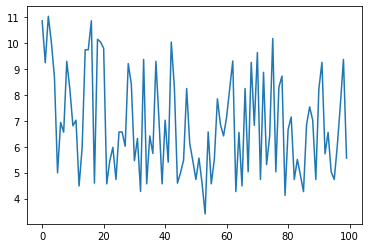

In [18]:
# 실험4
# 논문에서 f4에 해당하는 함수
def f4(player_strategies):
    y = (np.sum(player_strategies**2))**0.25 * (np.sin(50*np.sum(player_strategies**2)**0.1)**2 + 1.0)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f4,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()